<a href="https://colab.research.google.com/github/jjefferson2006/DSWP_JJ_altera/blob/main/outliers_como_ver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [23]:
l_colunas = ['ind01', 'ind02']
l_valores = [(-20.0,0.0, 0.0, 0.0,0.35, 0.40, 0.25, 0.30, 0.70, 0.55, 0.45, 0.50, 0.75, 0.60, 0.65, 0.20, 10 , 12, 25), (-50.0,0.0, 0.0,0.0,0.15, 0.80, 0.75, 0.25, 0.30,0.45,0.55,0.55,0.60,0.40,0.50,0.45,23,40,50)]
d_teste = dict(zip(l_colunas, l_valores))
df_teste = pd.DataFrame(d_teste)


In [24]:
df_teste

,ind01,ind02
0,-20.00,-50.00
1,0.00,0.00
2,0.00,0.00
3,0.00,0.00
4,0.35,0.15
5,0.40,0.80
6,0.25,0.75
7,0.30,0.25
8,0.70,0.30
9,0.55,0.45


In [25]:
l_lista = list(df_teste.columns)

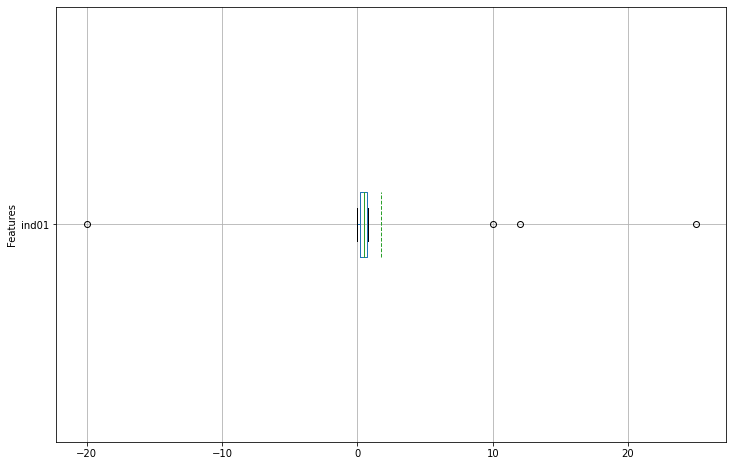

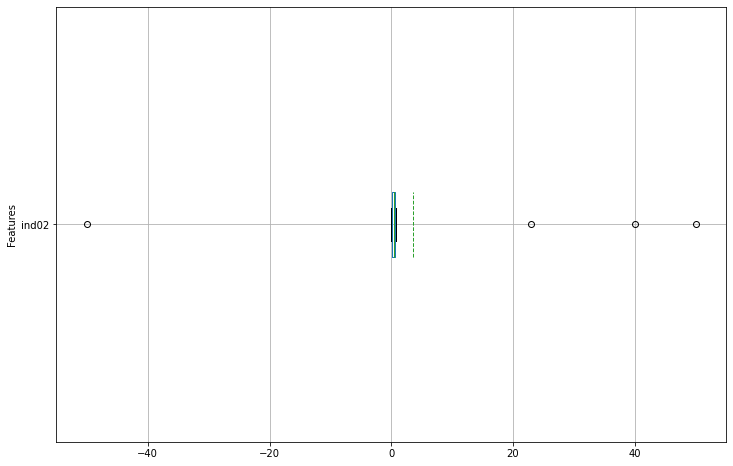

In [26]:
#tenure não tem outliers

for i in l_lista:
    df_teste[[i]].plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (12,8), vert = False, ylabel = 'Features')

In [27]:
for i in l_lista:
    
    Q1 = np.percentile(df_teste[i], 25)
    Q3 = np.percentile(df_teste[i], 75)
    IQR = Q3 - Q1
    print(f'++++++++')
    print(f'coluna: {i}')
    print(f'Q1:{Q1}')
    print(f'Q3:{Q3}\n')
    # Cálculo dos limites inferiores e superiores para detecção de outliers:
    lim_inf_out = Q1 - 1.5*IQR
    lim_sup_out = Q3 + 1.5*IQR
    print(f'Lim_inf_out: {lim_inf_out}')
    print(f'Lim_sup_out: {lim_sup_out}\n')
        
    #print(f"coluna: {i}; Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")
        #max e min
    min = df_teste[i].min()
    max = df_teste[i].max()
    print(f'max_valor: {max}')
    print(f'min_valor:{min}\n')
        
    perc_max = df_teste[i].value_counts()[df_teste[i].max()]/df_teste.shape[0]*100
    perc_min = df_teste[i].value_counts()[df_teste[i].min()]/df_teste.shape[0]*100
    print(f'perc_max_valor: {perc_max}')
    print(f'perc_min_valor:{perc_min}\n')
        
    mean = df_teste[i].mean()
    median = df_teste[i].median()
    moda = df_teste[i].mode()
    print(f'mean:{mean}')
    print(f'median: {median}')
    print(f'moda: {moda}')

++++++++
coluna: ind01
Q1:0.225
Q3:0.675

Lim_inf_out: -0.45000000000000007
Lim_sup_out: 1.35

max_valor: 25.0
min_valor:-20.0

perc_max_valor: 5.263157894736842
perc_min_valor:5.263157894736842

mean:1.7210526315789476
median: 0.45
moda: 0    0.0
dtype: float64
++++++++
coluna: ind02
Q1:0.2
Q3:0.675

Lim_inf_out: -0.5125
Lim_sup_out: 1.3875000000000002

max_valor: 50.0
min_valor:-50.0

perc_max_valor: 5.263157894736842
perc_min_valor:5.263157894736842

mean:3.6184210526315788
median: 0.45
moda: 0    0.0
dtype: float64


In [28]:
def trata_outliers(df, coluna):
    #sns.boxplot(x = coluna, data = df)
    print(f'++++++++')
    print(f'coluna: {coluna}')


    # Cálculo de Q1, Q3 e IQR:
    Q1 = np.percentile(df[coluna], 25)
    Q3 = np.percentile(df[coluna], 75)
    IQR = Q3 - Q1
    print(f"IQR: {IQR}")

    # Jeito mais fácil (menos trabalhoso).
    #IQR2 = stats.iqr(df[coluna]) 
    #IQR2 

    # Cálculo dos limites inferiores e superiores para detecção de outliers:
    limite_inferior_outliers = Q1 - 1.5*IQR
    limite_superior_outliers = Q3 + 1.5*IQR
    print(f"Limite inferior para outlier: {limite_inferior_outliers}; Limite superior para outliers: {limite_superior_outliers}")

    # Cálculo da mediana
    media = df[coluna].mean()
    print(f"Media: {media}")

    # Substituição dos outliers:
    df[coluna+'_o'] = df[coluna]

    df.loc[(df[coluna] > limite_superior_outliers)|(df[coluna] < limite_inferior_outliers), coluna+'_o'] = np.nan
    df[coluna+'_o'].fillna(media, inplace = True) # 'o' significa tratamento outlier --> indicação para mostrar que a coluna passou pelo tratamento dos outliers.

    return df, limite_superior_outliers

In [29]:
for h in l_lista:
    df_teste, limite_superior_outliers = trata_outliers(df=df_teste, coluna=h)

++++++++
coluna: ind01
IQR: 0.45000000000000007
Limite inferior para outlier: -0.45000000000000007; Limite superior para outliers: 1.35
Media: 1.7210526315789476
++++++++
coluna: ind02
IQR: 0.47500000000000003
Limite inferior para outlier: -0.5125; Limite superior para outliers: 1.3875000000000002
Media: 3.6184210526315788


In [30]:
df_teste

,ind01,ind02,ind01_o,ind02_o
0,-20.00,-50.00,1.721053,3.618421
1,0.00,0.00,0.000000,0.000000
2,0.00,0.00,0.000000,0.000000
3,0.00,0.00,0.000000,0.000000
4,0.35,0.15,0.350000,0.150000
5,0.40,0.80,0.400000,0.800000
6,0.25,0.75,0.250000,0.750000
7,0.30,0.25,0.300000,0.250000
8,0.70,0.30,0.700000,0.300000
9,0.55,0.45,0.550000,0.450000


In [31]:
l_lista_out = list(df_teste.columns)

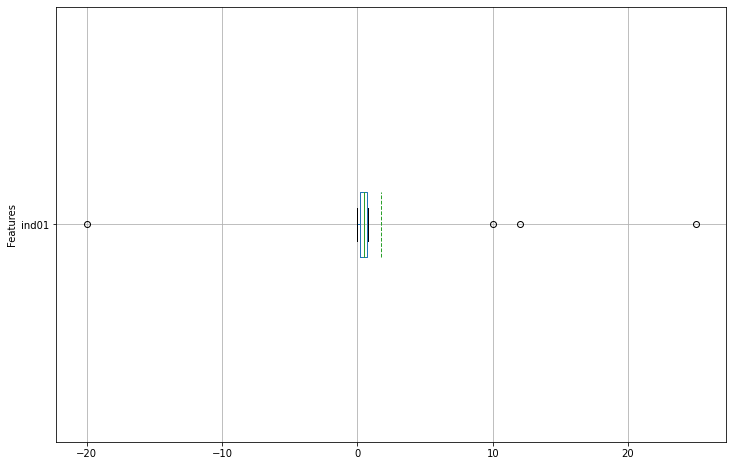

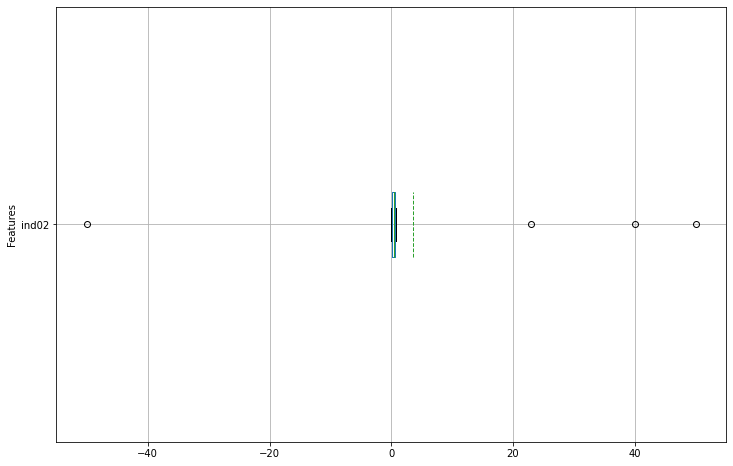

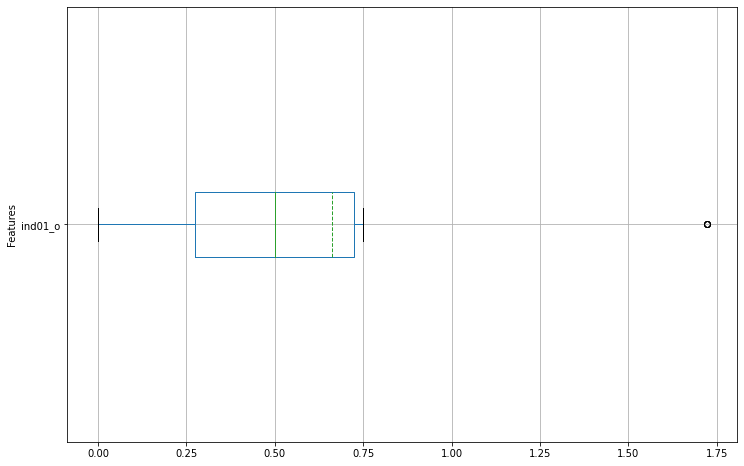

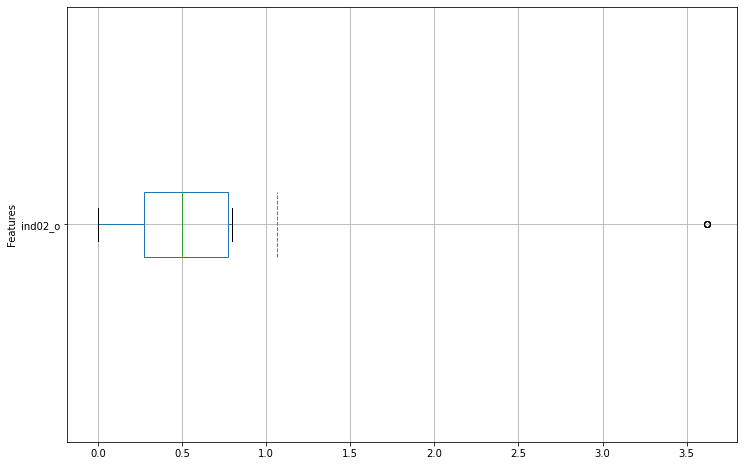

In [32]:
#tenure não tem outliers

for i in l_lista_out:
    df_teste[[i]].plot(kind = 'box', showmeans = True, meanline = True, grid = True, figsize = (12,8), vert = False, ylabel = 'Features')